In [46]:
import numpy as np
import seaborn as sb
import pandas as pd
import csv

flow_data_name = 'dir.csv'
flow_data = pandas.read_csv(flow_data_name)
#display(flow_data)
flow_data.drop(1,inplace=True) #removing one measurement which was over 5 min for some reason
#describe(flow_data)
flow_data.head()
flow_data_with_flow_measured= flow_data[np.isfinite(flow_data['change'])]
print('Average both directions:')
display(abs(flow_data).describe()) #absolute values so it doesn't depend on direction
print('Change to the right:')
display(abs(flow_data[flow_data['change']>0]).describe()) #change to the right
print('Change to the left:')
display(abs(flow_data[flow_data['change']<0]).describe()) #change to the left

Average both directions:


,fraction_24h,stable_pre,change,stable_post,minutes
count,34.000000,20.000000,20.000000,20.000000,34.000000
mean,0.001204,8.700000,6.750000,9.000000,1.734314
std,0.000815,4.079474,2.788605,2.828427,1.174296
min,0.000197,2.000000,0.000000,4.000000,0.283333
25%,0.000726,6.000000,5.000000,7.750000,1.045833
50%,0.001001,8.500000,7.000000,9.000000,1.441667
75%,0.001481,10.250000,8.000000,10.250000,2.133333
max,0.003414,16.000000,13.000000,14.000000,4.916667


Change to the right:


,fraction_24h,stable_pre,change,stable_post,minutes
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,0.001671,11.833333,7.500000,9.166667,2.405556
std,0.001022,3.868678,2.167948,0.752773,1.471570
min,0.000764,8.000000,5.000000,8.000000,1.100000
25%,0.000790,8.250000,6.000000,9.000000,1.137500
50%,0.001389,12.000000,7.000000,9.000000,2.000000
75%,0.002500,15.000000,9.500000,9.750000,3.600000
max,0.003021,16.000000,10.000000,10.000000,4.350000


Change to the left:


,fraction_24h,stable_pre,change,stable_post,minutes
count,13.000000,13.000000,13.000000,13.000000,13.000000
mean,0.001322,7.153846,6.923077,8.692308,1.903846
std,0.000818,3.531906,2.498718,3.400603,1.178632
min,0.000197,2.000000,3.000000,4.000000,0.283333
25%,0.000752,6.000000,5.000000,7.000000,1.083333
50%,0.001169,6.000000,7.000000,8.000000,1.683333
75%,0.001655,10.000000,8.000000,11.000000,2.383333
max,0.003414,14.000000,13.000000,14.000000,4.916667


In [68]:
''' The key value are 
'change' - the flow required to change direction and 
'minutes' - time in minutes until fish changed direction
'''

" The key value are \n'change' - the flow required to change direction and \n'minutes' - time in minutes until fish changed direction\n"

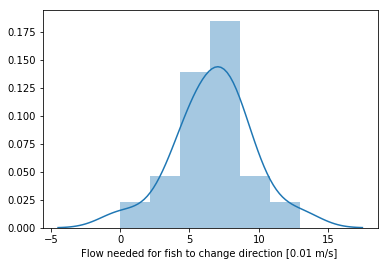

n = 20


In [55]:
#plot flow speed in 0.01 m/s at which fish changed direction or swam off
avgchange = abs(flow_data_with_flow_measured['change'])
plot1 = sb.distplot(avgchange,kde = True)
plot1.set(xlabel='Flow needed for fish to change direction [0.01 m/s] ', ylabel='')
plt.show()
print('n = {0}'.format(len(avgchange)))

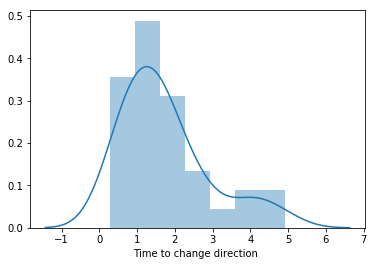

n = 34


In [67]:
#plot flow speed in 0.01 m/s at which fish changed direction or swam off
avgtime = abs(flow_data['minutes'])
plot1 = sb.distplot(avgtime,kde = True)
plot1.set(xlabel='Time to change direction ', ylabel='')
plt.show()
print('n = {0}'.format(len(avgtime)))

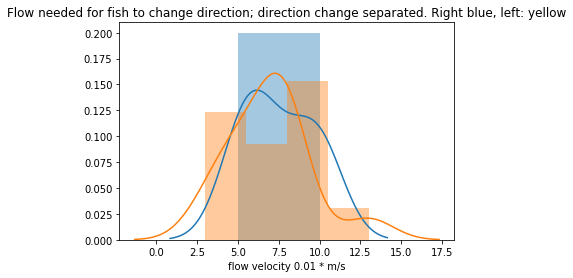

right (blue) n = 6
left (yellow) n = 13


In [64]:
# plot delay in response 
right = abs(flow_data[flow_data['change']>0]['change'])
left = abs(flow_data[flow_data['change']<0]['change'])
plot2 = sb.distplot(right,kde = True)
plot2 = sb.distplot(left,kde = True)
plot2.set(xlabel = 'flow velocity 0.01 * m/s', title='Flow needed for fish to change direction; direction change separated. Right blue, left: yellow', ylabel='')
plt.show()
#blue right
print('right (blue) n = {0}'.format(len(right)))
print('left (yellow) n = {0}'.format(len(left)))
#yellow: left

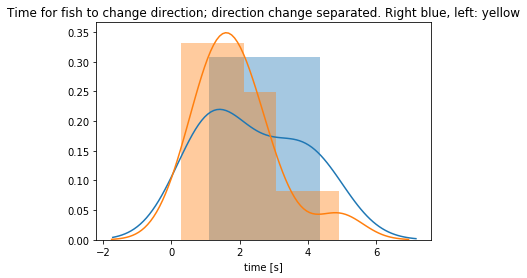

right (blue) n = 6
left (yellow) n = 13


In [65]:
# plot delay in response 
right = flow_data[flow_data['change']>0]['minutes']
left = flow_data[flow_data['change']<0]['minutes']
plot2 = sb.distplot(right,kde = True)
plot2 = sb.distplot(left,kde = True)
plot2.set(xlabel = 'time [s]', title='Time for fish to change direction; direction change separated. Right blue, left: yellow', ylabel='')
plt.show()
#blue right
print('right (blue) n = {0}'.format(len(right)))
print('left (yellow) n = {0}'.format(len(left)))
#yellow: left